<a href="https://colab.research.google.com/github/Dushyanty/YBIF/blob/main/YBIF_7_BigSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(r'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Big%20Sales%20Data.csv')

In [ ]:
df.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  float64
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  float64
 9   Outlet_Location_Type       14204 non-null  float64
 10  Outlet_Type                14204 non-null  float64
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 1.3+ MB


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [ ]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

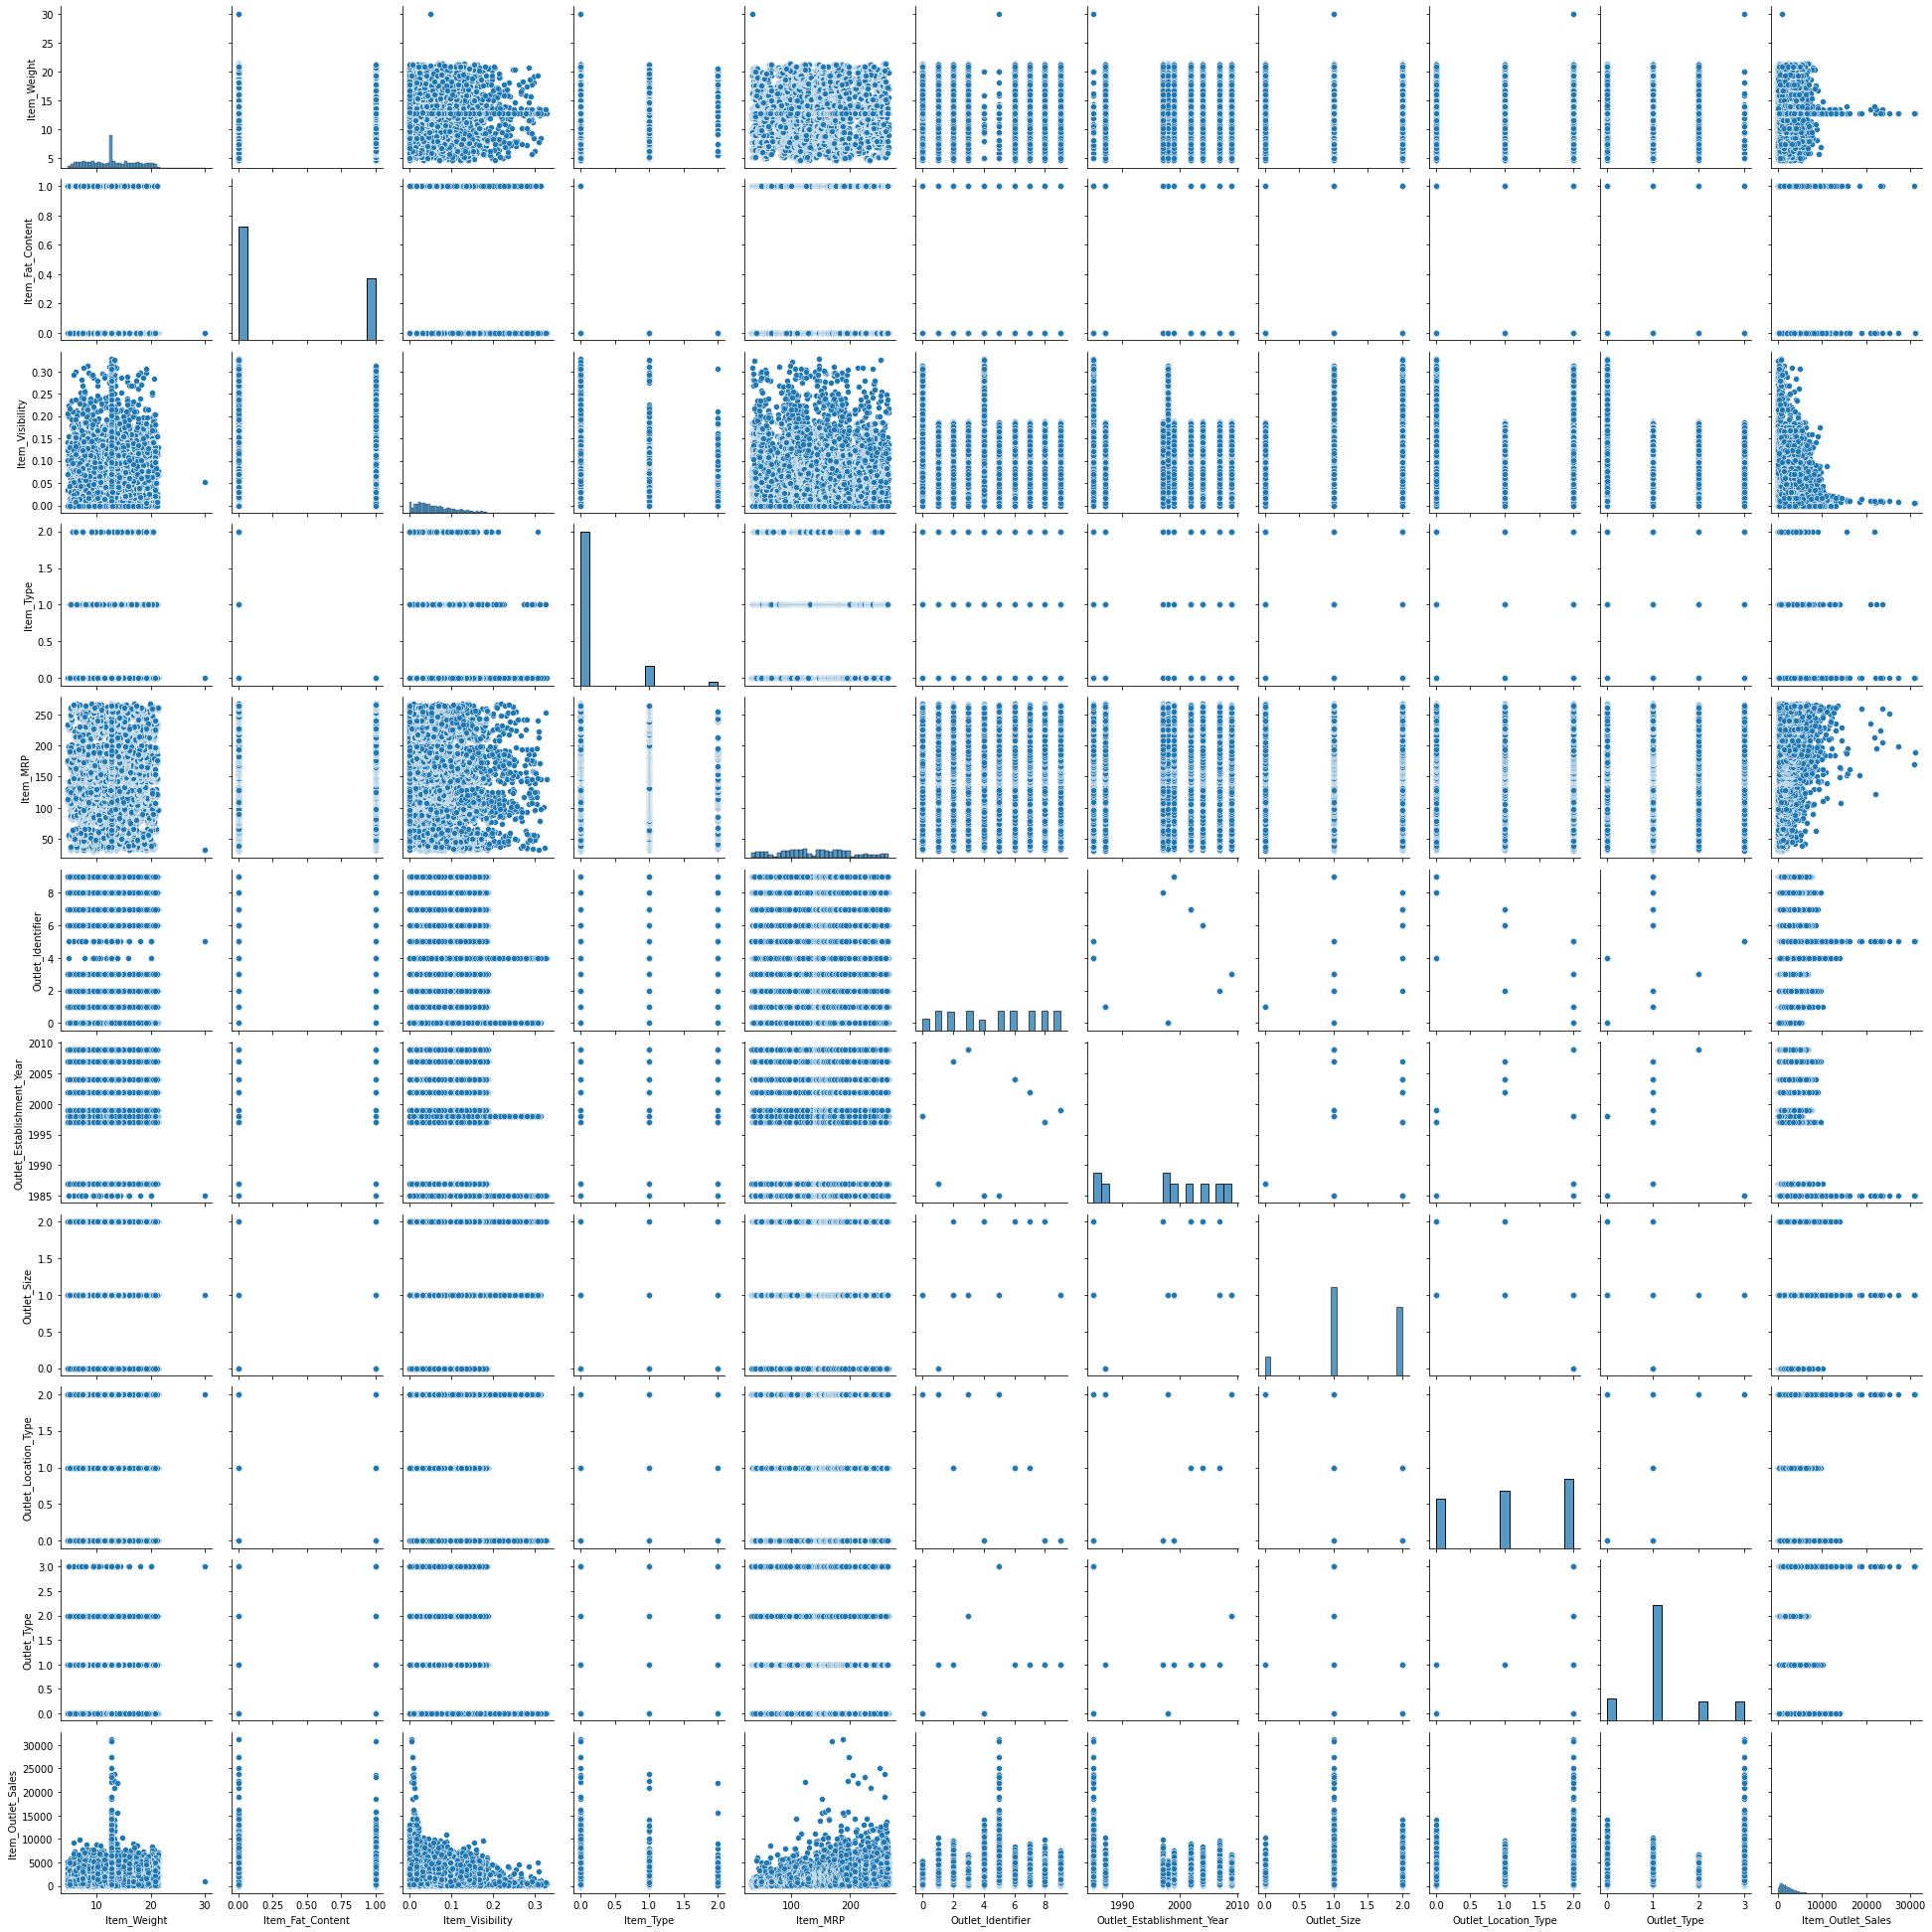

In [ ]:
sns.pairplot(df)

In [ ]:
df[['Item_Identifier']].value_counts()

Item_Identifier
FDQ08              10
FDO24              10
FDQ19              10
FDQ28              10
FDQ31              10
                   ..
FDM52               7
FDM50               7
FDL50               7
FDM10               7
FDR51               7
Length: 1559, dtype: int64

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             8485
Regular             4824
LF                   522
reg                  195
low fat              178
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content' :{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}},inplace=True)

In [ ]:
df[['Item_Fat_Content']].value_counts()

Item_Fat_Content
Low Fat             9185
Regular             5019
dtype: int64

In [ ]:
df.replace({'Item_Fat_Content' :{'Low Fat':0,'Regular':1}}, inplace=True)

In [ ]:
df[['Item_Type']].value_counts()

Item_Type
0            12376
1             1548
2              280
dtype: int64

In [ ]:
df.replace({'Item_Type': {'Fruits and Vegetables':0,'Snack Foods':0,'Household':1,'Frozen Foods':0,
                          'Dairy':0 ,'Baking Goods':0,'Canned':0,'Health and Hygiene':0,
                           'Meat':0, 'Soft Drinks':0, 'Breads':0, 'Hard Drinks':0 ,'Others':2,
                          'Starchy Foods':0, 'Breakfast':0, 'Seafood':0 }}, inplace=True)

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
OUT027               1559
OUT013               1553
OUT035               1550
OUT046               1550
OUT049               1550
OUT045               1548
OUT018               1546
OUT017               1543
OUT010                925
OUT019                880
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
OE= OrdinalEncoder()

In [ ]:
df[['Outlet_Identifier']]=  OE.fit_transform(df[['Outlet_Identifier']])

In [ ]:
df[['Outlet_Identifier']].value_counts()

Outlet_Identifier
5.0                  1559
1.0                  1553
6.0                  1550
8.0                  1550
9.0                  1550
7.0                  1548
3.0                  1546
2.0                  1543
0.0                   925
4.0                   880
dtype: int64

In [ ]:
df[['Outlet_Size']]=OE.fit_transform(df[['Outlet_Size']])
df[['Outlet_Size']].value_counts()

Outlet_Size
1.0            7122
2.0            5529
0.0            1553
dtype: int64

In [ ]:
df[['Outlet_Location_Type']]=OE.fit_transform(df[['Outlet_Location_Type']])
df[['Outlet_Location_Type']].value_counts()

Outlet_Location_Type
2.0                     5583
1.0                     4641
0.0                     3980
dtype: int64

In [ ]:
df[['Outlet_Type']]=OE.fit_transform(df[['Outlet_Type']])
df[['Outlet_Type']].value_counts()

Outlet_Type
1.0            9294
0.0            1805
3.0            1559
2.0            1546
dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,9.0,1999,1.0,0.0,1.0,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,2.0,2007,1.0,1.0,1.0,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,3.0,2009,1.0,2.0,2.0,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,4.0,1985,2.0,0.0,0.0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,2.0,2007,1.0,1.0,1.0,352.874000


In [ ]:
y=df['Item_Outlet_Sales']

In [ ]:
y.shape

(14204,)

In [ ]:
y

0         436.608721
1         443.127721
2         564.598400
3        1719.370000
4         352.874000
            ...     
14199    4984.178800
14200    2885.577200
14201    2885.577200
14202    3803.676434
14203    3644.354765
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [ ]:
X= df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [ ]:
X.shape

(14204, 10)

In [ ]:
X['Item_Weight'].fillna(X.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [ ]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,9.0,1999,1.0,0.0,1.0
1,12.300000,0,0.111904,0,33.9874,2.0,2007,1.0,1.0,1.0
2,12.300000,0,0.111728,0,33.9874,3.0,2009,1.0,2.0,2.0
3,12.300000,0,0.000000,0,34.3874,4.0,1985,2.0,0.0,0.0
4,9.800000,1,0.045523,0,35.0874,2.0,2007,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,6.0,2004,2.0,1.0,1.0
14200,12.800000,0,0.070013,0,262.8252,2.0,2007,1.0,1.0,1.0
14201,12.800000,0,0.069561,0,263.0252,1.0,1987,0.0,2.0,1.0
14202,12.695469,0,0.069282,0,263.5252,5.0,1985,1.0,2.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss= StandardScaler()

In [ ]:
X=ss.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9942, 10), (4262, 10), (9942,), (4262,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=42529)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42529)

In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
y_pred.shape

(4262,)

In [ ]:
y_pred

array([1753.21242455,  742.04529084,  473.0142921 , ..., 3532.28212536,
       3224.04909248, 1769.18707989])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

1555397.5649828184

In [ ]:
mean_absolute_error(y_test,y_pred)

806.7526757819022

In [ ]:
r2_score(y_test,y_pred)

0.5183232415542725